# Machine Learning para Economistas

## Trabajo Práctico 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Miércoles 16 de octubre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP2
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [40]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
buscar = "mostly harmless econometrics"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

In [35]:
response = requests.request("GET", url)
print(response)

<Response [200]>


In [36]:
data = response.json()

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [45]:
resultados = [data['results']]
df = pd.DataFrame([item['price'] for item in data['results']], columns = ['price'])

print(f'El precio promedio es: {sum(df['price'])/len(df)}')
print(f'El precio máximo es: {max(df['price'])}')
print(f'El precio mínimo es: {min(df['price'])}')

El precio promedio es: 150150.4306
El precio máximo es: 909086.0
El precio mínimo es: 2893.28


#### Ejercicio 3
Armen un histograma de los precios usando Matplotlib. ¿Ven algún <i>outlier<i>? 

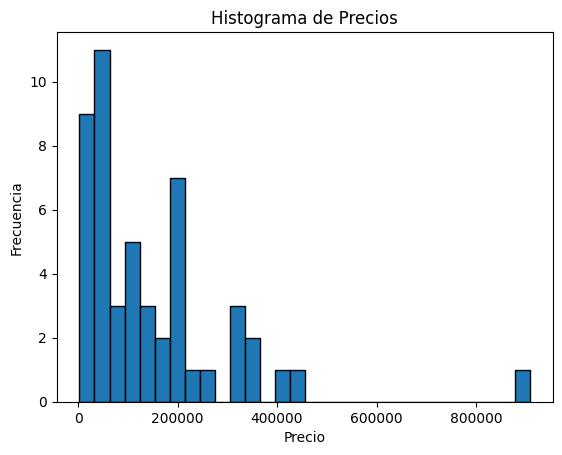

In [49]:
plt.hist(df['price'], bins=30, edgecolor='black')

plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.show()

# Si hay un outlier que es el precio más alto de todos

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [39]:
url = "https://api.mercadolibre.com/sites/{}/search?seller_id={}".format("MLA","385635403")
response = requests.request("GET", url)
response

<Response [200]>

In [52]:
data = response.json()

In [53]:
resultados = [data['results']]
df2 = pd.DataFrame([item['price'] for item in data['results']], columns = ['price'])

In [55]:
print(f'El precio promedio es: {sum(df2['price'])/len(df2)}')
print(f'El precio máximo es: {max(df2['price'])}')
print(f'El precio mínimo es: {min(df2['price'])}')

El precio promedio es: 35353.88
El precio máximo es: 82499
El precio mínimo es: 15092


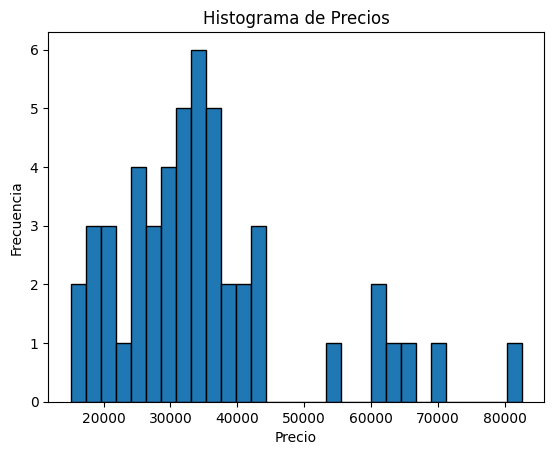

In [56]:
plt.hist(df2['price'], bins=30, edgecolor='black')

plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

plt.show()

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.